# Revisão

## Geral

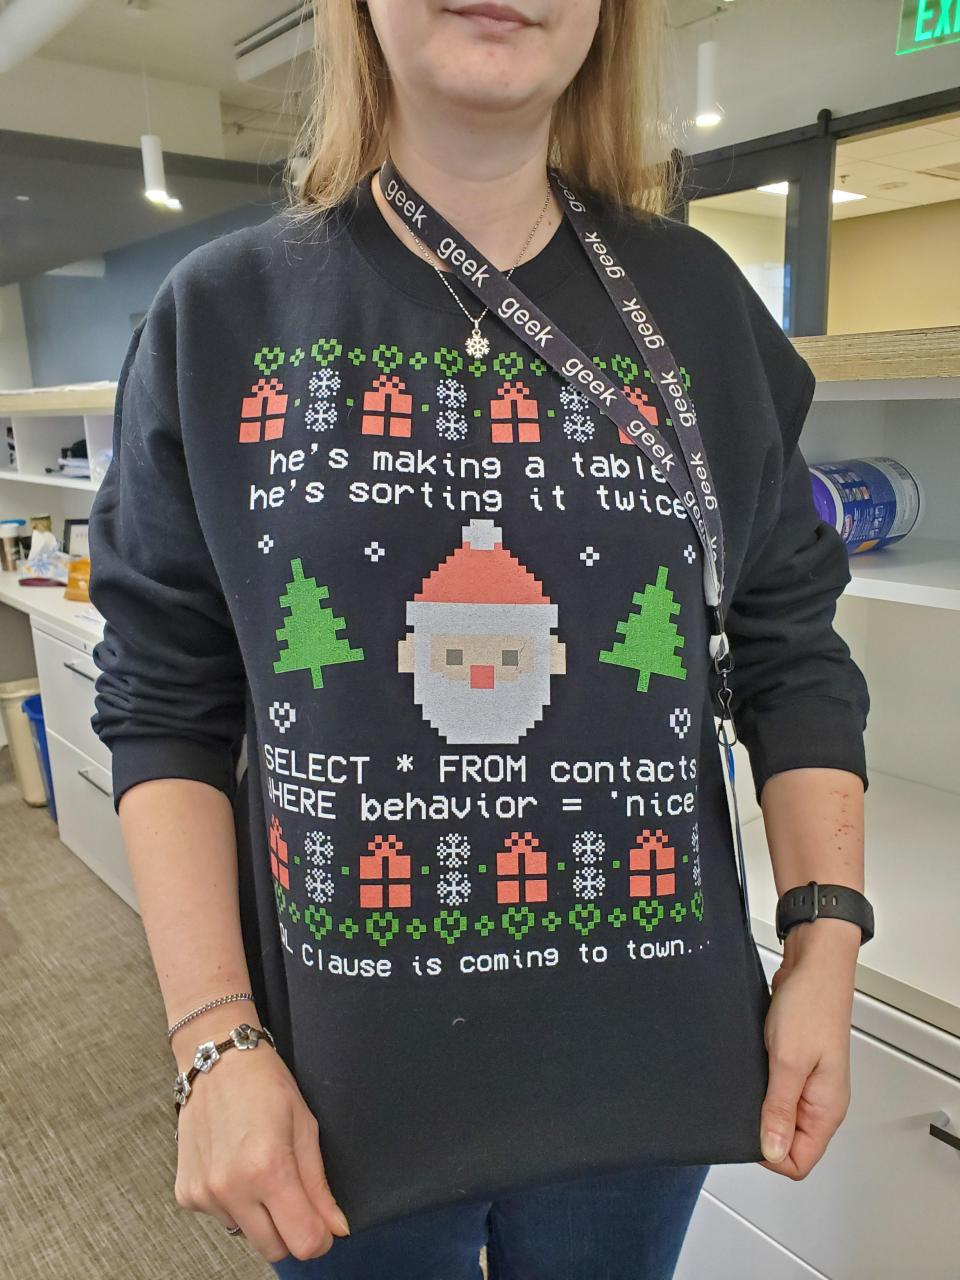

## Revisão de joins

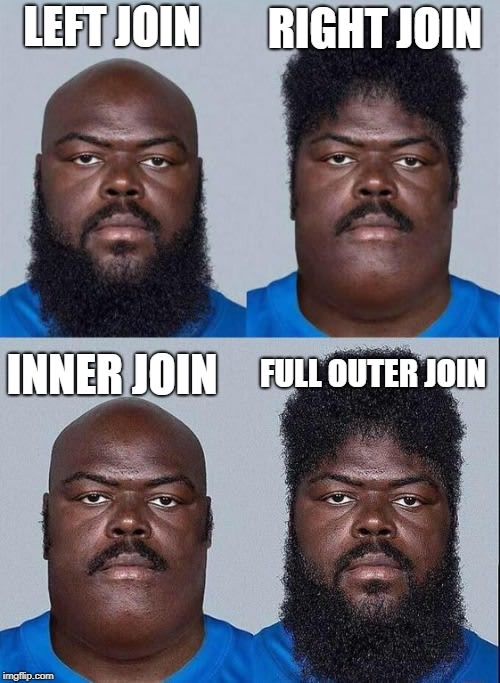

## Bootcamp real!

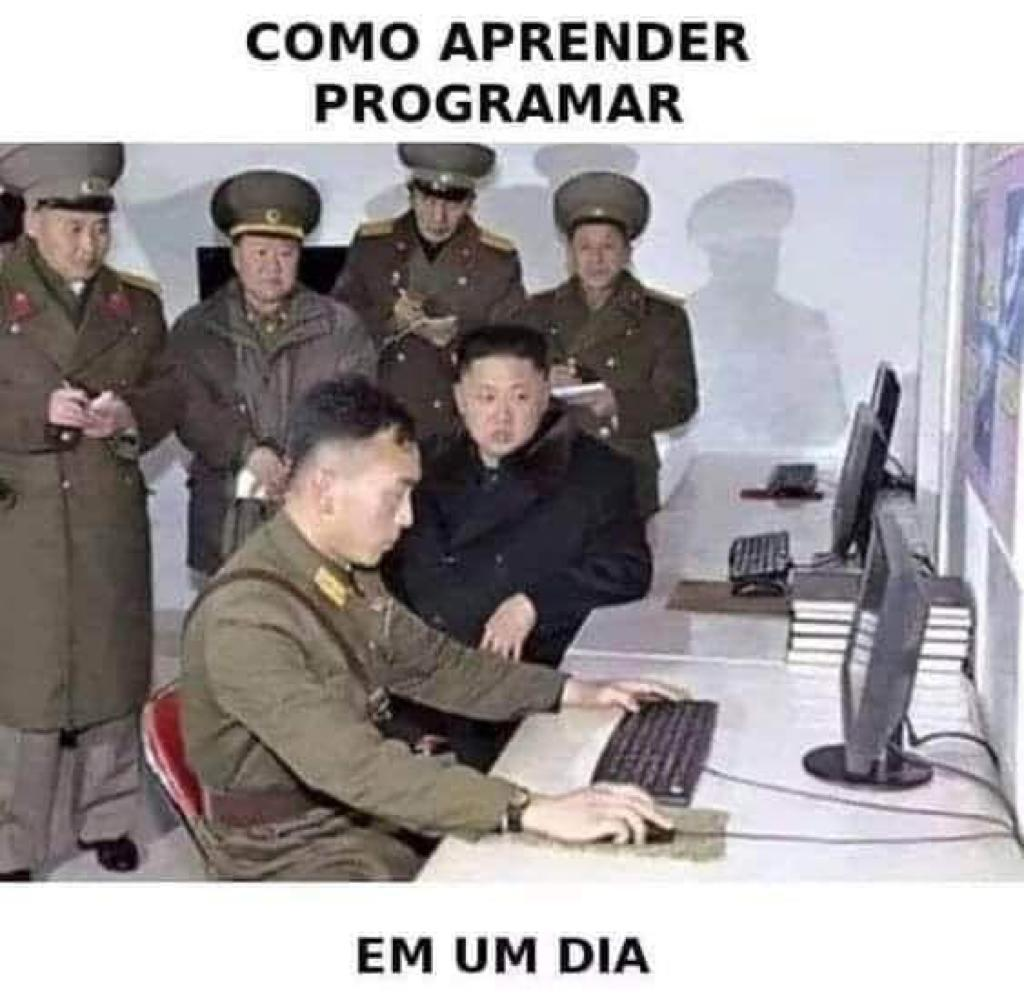

## Duvidas

# Aula 07: Windon Functions

Na aula de hoje iremos explorar o funcionamento das funções de janela e como construir queries para análises mais complexas.

Referências:
- [Functions](https://learnsql.com/blog/mysql-window-functions-examples/)
- [Over parameters](https://www.brentozar.com/sql-syntax-examples/window-function-examples-sql-server/)

# Avisos

1. Happy Hour virtual na próxima sexta, no final da aula.
1. Confirmar os dados no [link](https://docs.google.com/forms/d/e/1FAIpQLSdqBDcGfkSNqB_DVJ3MSN0ZJxnsq-gPCAg7y0AN6ihfEy7XAQ/viewform) 

# Habilidades a serem desenvolvidas

Ao final da aula, o aluno deve:
1. Entender como utilizar funções de janela;
1. Saber aplicar diferentes agregações às funções de janela.

# Windon Functions

## RANK

Calcula o ranque da linha de acordo com os valores especificados da coluna.

Exemplo: Quais foram os dias de maior movimento? Faça um rank dos dias por volume de pedidos, ordenados por número de pedidos.

Query:

    Select order_date, count(*),
    RANK() OVER (order by count(*) DESC)
    from orders
    group by order_date;

Resultado:

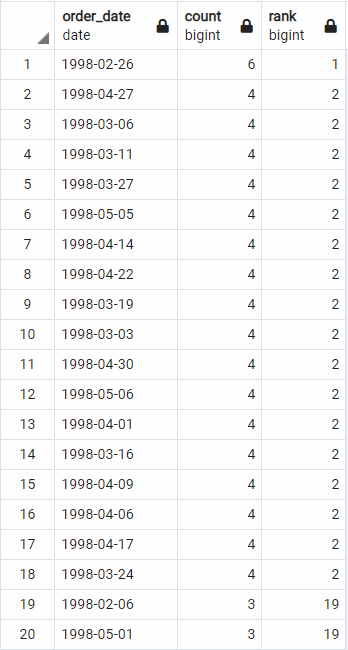

### RANK em mais de uma coluna

Query:

    Select order_date, count(*),
    RANK() OVER (order by count(*) DESC, order_date ASC)
    from orders
    group by order_date;

Resultado:

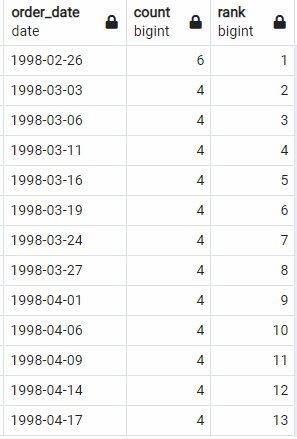

## DENSE_RANK

Da mesma forma que o `RANK`, calcula o rank da linha de acordo com os valores especificados da coluna, **sem pular valores**.

Exemplo: Quais foram os dias de maior movimento? Faça um rank **sem gaps** dos dias por volume de pedidos, ordenados por número de pedidos.

Query:

    Select order_date, count(*),
    DENSE_RANK() OVER (order by count(*) DESC)
    from orders
    group by order_date;

Resultado:

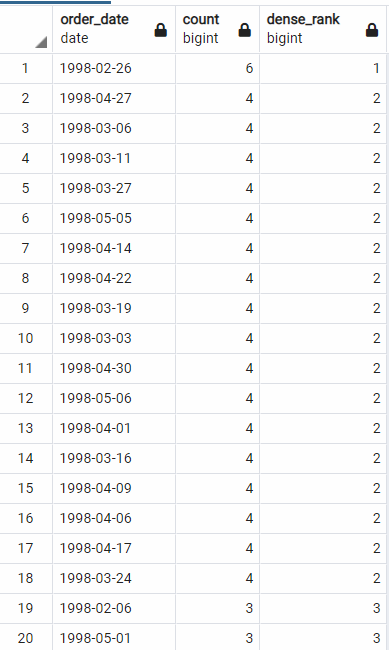

## ROW_NUMBER

Adiciona um número para cada linha específica numa ordem especifica.

Exemplo: Aplique a função `ROW_NUMBER` no exemplo acima e perceba a diferença.

Query:

    Select order_date, count(*),
    ROW_NUMBER() OVER (order by count(*) DESC, order_date ASC)
    from orders
    group by order_date;

Resultado:

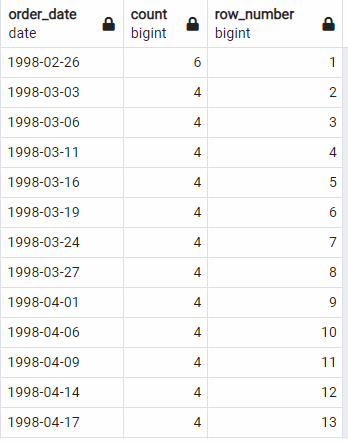

## LEAD

Pega o valor da próxima linha da coluna selecionada.

Exemplo: Compare o total de pedidos de um mês, com o mês **subsequente**.

Query (feita em partes para fins pedagógicos, só a última é suficiente):

    -- Compare o total de pedidos de um mês, com o mês **subsequente**.
    -- 1. Achar numero de pedidos por mês
    Select to_char(order_date, 'YYYY-MM') mes, count(*)
    from orders
    group by to_char(order_date, 'YYYY-MM')
    order by mes;

    -- 2. Trazer o valor do mês subsequente para a mesma linha do mês atual
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    LEAD(count(*)) OVER (order by to_char(order_date, 'YYYY-MM')) pedidos_proximo_mes
    from orders
    group by to_char(order_date, 'YYYY-MM');

    -- 3. Fazer a comparação: no caso, diferença
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    count(*) - LEAD(count(*)) OVER (order by to_char(order_date, 'YYYY-MM'))  as diferenca
    from orders
    group by to_char(order_date, 'YYYY-MM');

Resultado:

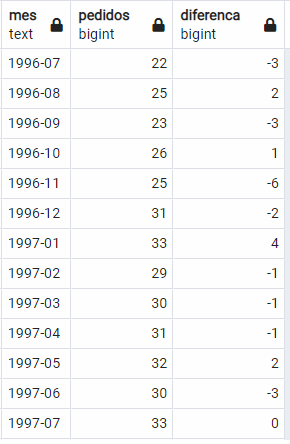

## LAG

Pega o valor da linha anterior da coluna selecionada.

Exemplo: Compare o total de pedidos de um mês, com o mês **anterior**.

Query:

    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    LAG(count(*)) OVER (order by to_char(order_date, 'YYYY-MM')) mes_anterior,
    count(*) - LAG(count(*)) OVER (order by to_char(order_date, 'YYYY-MM'))  as diferenca
    from orders
    group by to_char(order_date, 'YYYY-MM');

Resultado:

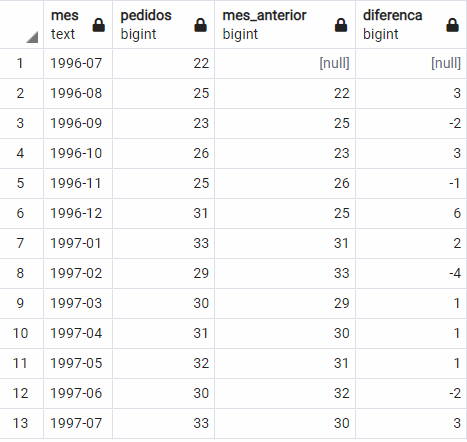

### Parametros

LAG(column, 2, 0) -> Retorna o valor da segunda linha anterior de uma coluna, colocando 0 no lugar de Nan caso o valor não exista.   
LEAD(column, 3, 0) -> Retorna o valor da terceira linha subsequente de uma coluna, colocando 0 no lugar de Nan caso o valor não exista.

Query:

    -- lag
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    LAG(count(*)) OVER (order by to_char(order_date, 'YYYY-MM')) mes_anterior,
    LAG(count(*), 2) OVER (order by to_char(order_date, 'YYYY-MM')) dois_mes_atras,
    LAG(count(*), 3) OVER (order by to_char(order_date, 'YYYY-MM')) tres_mes_atras
    from orders
    group by to_char(order_date, 'YYYY-MM');


    -- lead
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    LEAD(count(*)) OVER (order by to_char(order_date, 'YYYY-MM')) mes_posterior,
    LEAD(count(*), 2) OVER (order by to_char(order_date, 'YYYY-MM')) dois_mes_a_frente,
    LEAD(count(*), 3) OVER (order by to_char(order_date, 'YYYY-MM')) tres_mes_a_frente
    from orders
    group by to_char(order_date, 'YYYY-MM');


Resultado:

## FIRST_VALUE

Retorna o primeiro valor da série.  
Exemplo: Compare o volume de vendas de cada mês com o primeiro mês da série histórica.

Query:

    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    FIRST_VALUE(count(*)) OVER ( order by to_char(order_date, 'YYYY-MM'))
    from orders
    group by to_char(order_date, 'YYYY-MM');

Resultado:

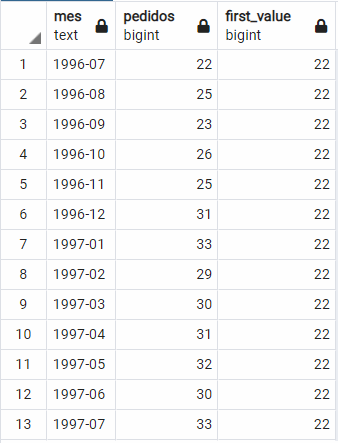

## LAST_VALUE

Retorna o último valor da série.  
Exemplo: Compare o volume de vendas de cada mês com o último da série histórica.

**OBS:** Pode dar problema se os limites não estiverem bem definidos.....

Query:

    Deu problema....
    
    Com um pequeno ajuste / solução alternativa:
    
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    FIRST_VALUE(count(*)) OVER ( order by to_char(order_date, 'YYYY-MM') DESC)
    from orders
    group by to_char(order_date, 'YYYY-MM');

Resultado:

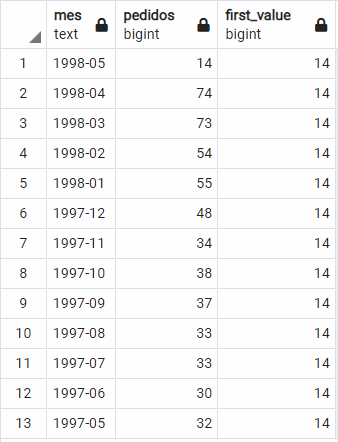

## OVER

Pode ser passado em branco. Nesse caso, é criada uma coluna com o valor total da agregação em todas as linhas.  

Exemplo: Compare o volume de vendas de cada mês com o total de pedidos.

Query:

    -- 1. Achar total de pedidos para validar o proximo resultado
    with temp_table as (
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos
    from orders
    group by to_char(order_date, 'YYYY-MM')
    order by 1)
    Select SUM(pedidos) as total_pedidos from temp_table;

    -- 2. Trazer essa info para nossa tabela.
    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    SUM(count(*)) OVER () as total_pedidos
    from orders
    group by to_char(order_date, 'YYYY-MM')
    order by 1;

Resultado:

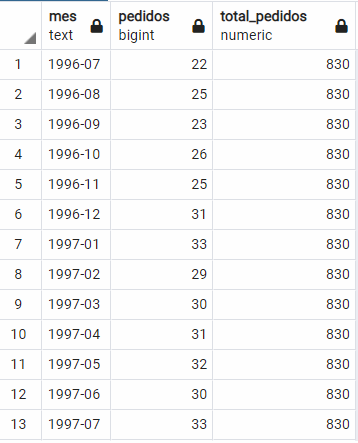

### ORDER BY

Ordena as linhas nas quais a função será aplicada. *Não ordena* a tabela toda!  

Exemplo: Calcule o número de pedidos acumulados mês-a-mês.

Query:

    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    SUM(count(*)) OVER (order by to_char(order_date, 'YYYY-MM') ) as total_acumulado
    from orders
    group by to_char(order_date, 'YYYY-MM')
    order by 1;

Resultado:

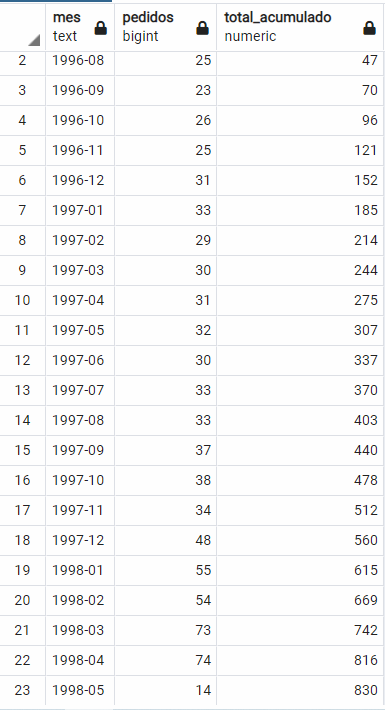

### PARTITION BY

Reinicia o contador toda vez toda vez que a(s) coluna(s) indicada(s) muda(m) de valor.

Exemplo: Calcule o acumulado de pedido do mês para cada método de envio. 

Query:

    Select to_char(order_date, 'YYYY-MM') mes, ship_via, count(*) pedidos,
    SUM(count(*)) OVER (partition by to_char(order_date, 'YYYY-MM') 
                        order by to_char(order_date, 'YYYY-MM'), ship_via) as total_acumulado_por_metodo
    from orders
    group by to_char(order_date, 'YYYY-MM'), ship_via
    order by 1;

Resultado:

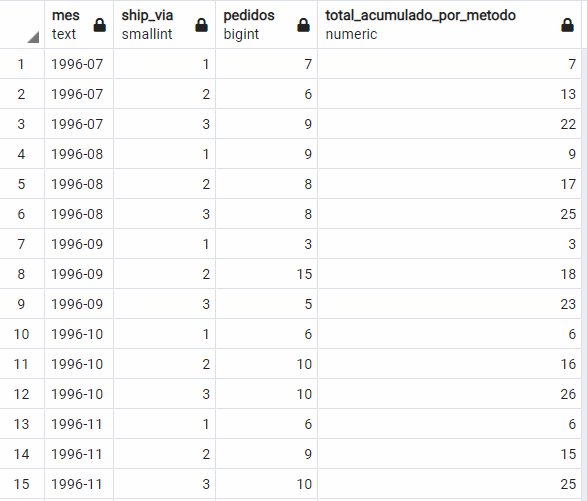

### ROWS BETWEEN

Adiciona uma restrição extra às linhas para o cálculo das funções calculadas.

Exemplo: Compare o número de pedidos com a média dos três meses anteriores.

Query:

    Select to_char(order_date, 'YYYY-MM') mes, count(*) pedidos,
    AVG(count(1)) OVER ( order by to_char(order_date, 'YYYY-MM') 
                       ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) as media_movel_3_meses
    from orders
    group by to_char(order_date, 'YYYY-MM')
    order by 1;

Resultado:

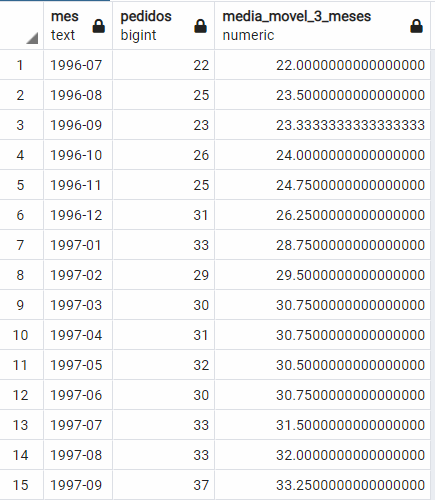

# Exercícíos

Enviar para o email filipe.furlan@letscode.com.br até **2021/07/31** um arquivo de texto (`785_firstname_lastname_aula07.sql`) com a resolução dos exercicios abaixo.

IMPORTANTE: Inserir uma linha de comentário `-- exercicio XX` (XX = 1, 2A, 2B etc) antes de cada solução.

1. Faça uma lista com o ranque das ordens, por valor total (incluindo frete e desconto).
1. Compare o valor de cada ordem com o valor total de vendas.
    1. Crie um ranque da participação das ordens no valor total vendido.
1. Crie um relatório que traga o número de pedidos e o valor total deles, bem como seus valores acumulados, por mês para cada vendedor.